<a href="https://colab.research.google.com/github/Isaac0py/Class/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSV/mall_customer.csv')
df.head()
df.tail()
df.sample(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
140,141,Female,57,75,5
150,151,Male,43,78,17
83,84,Female,46,54,44
92,93,Male,48,60,49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()
df = df.iloc[:, 1:]

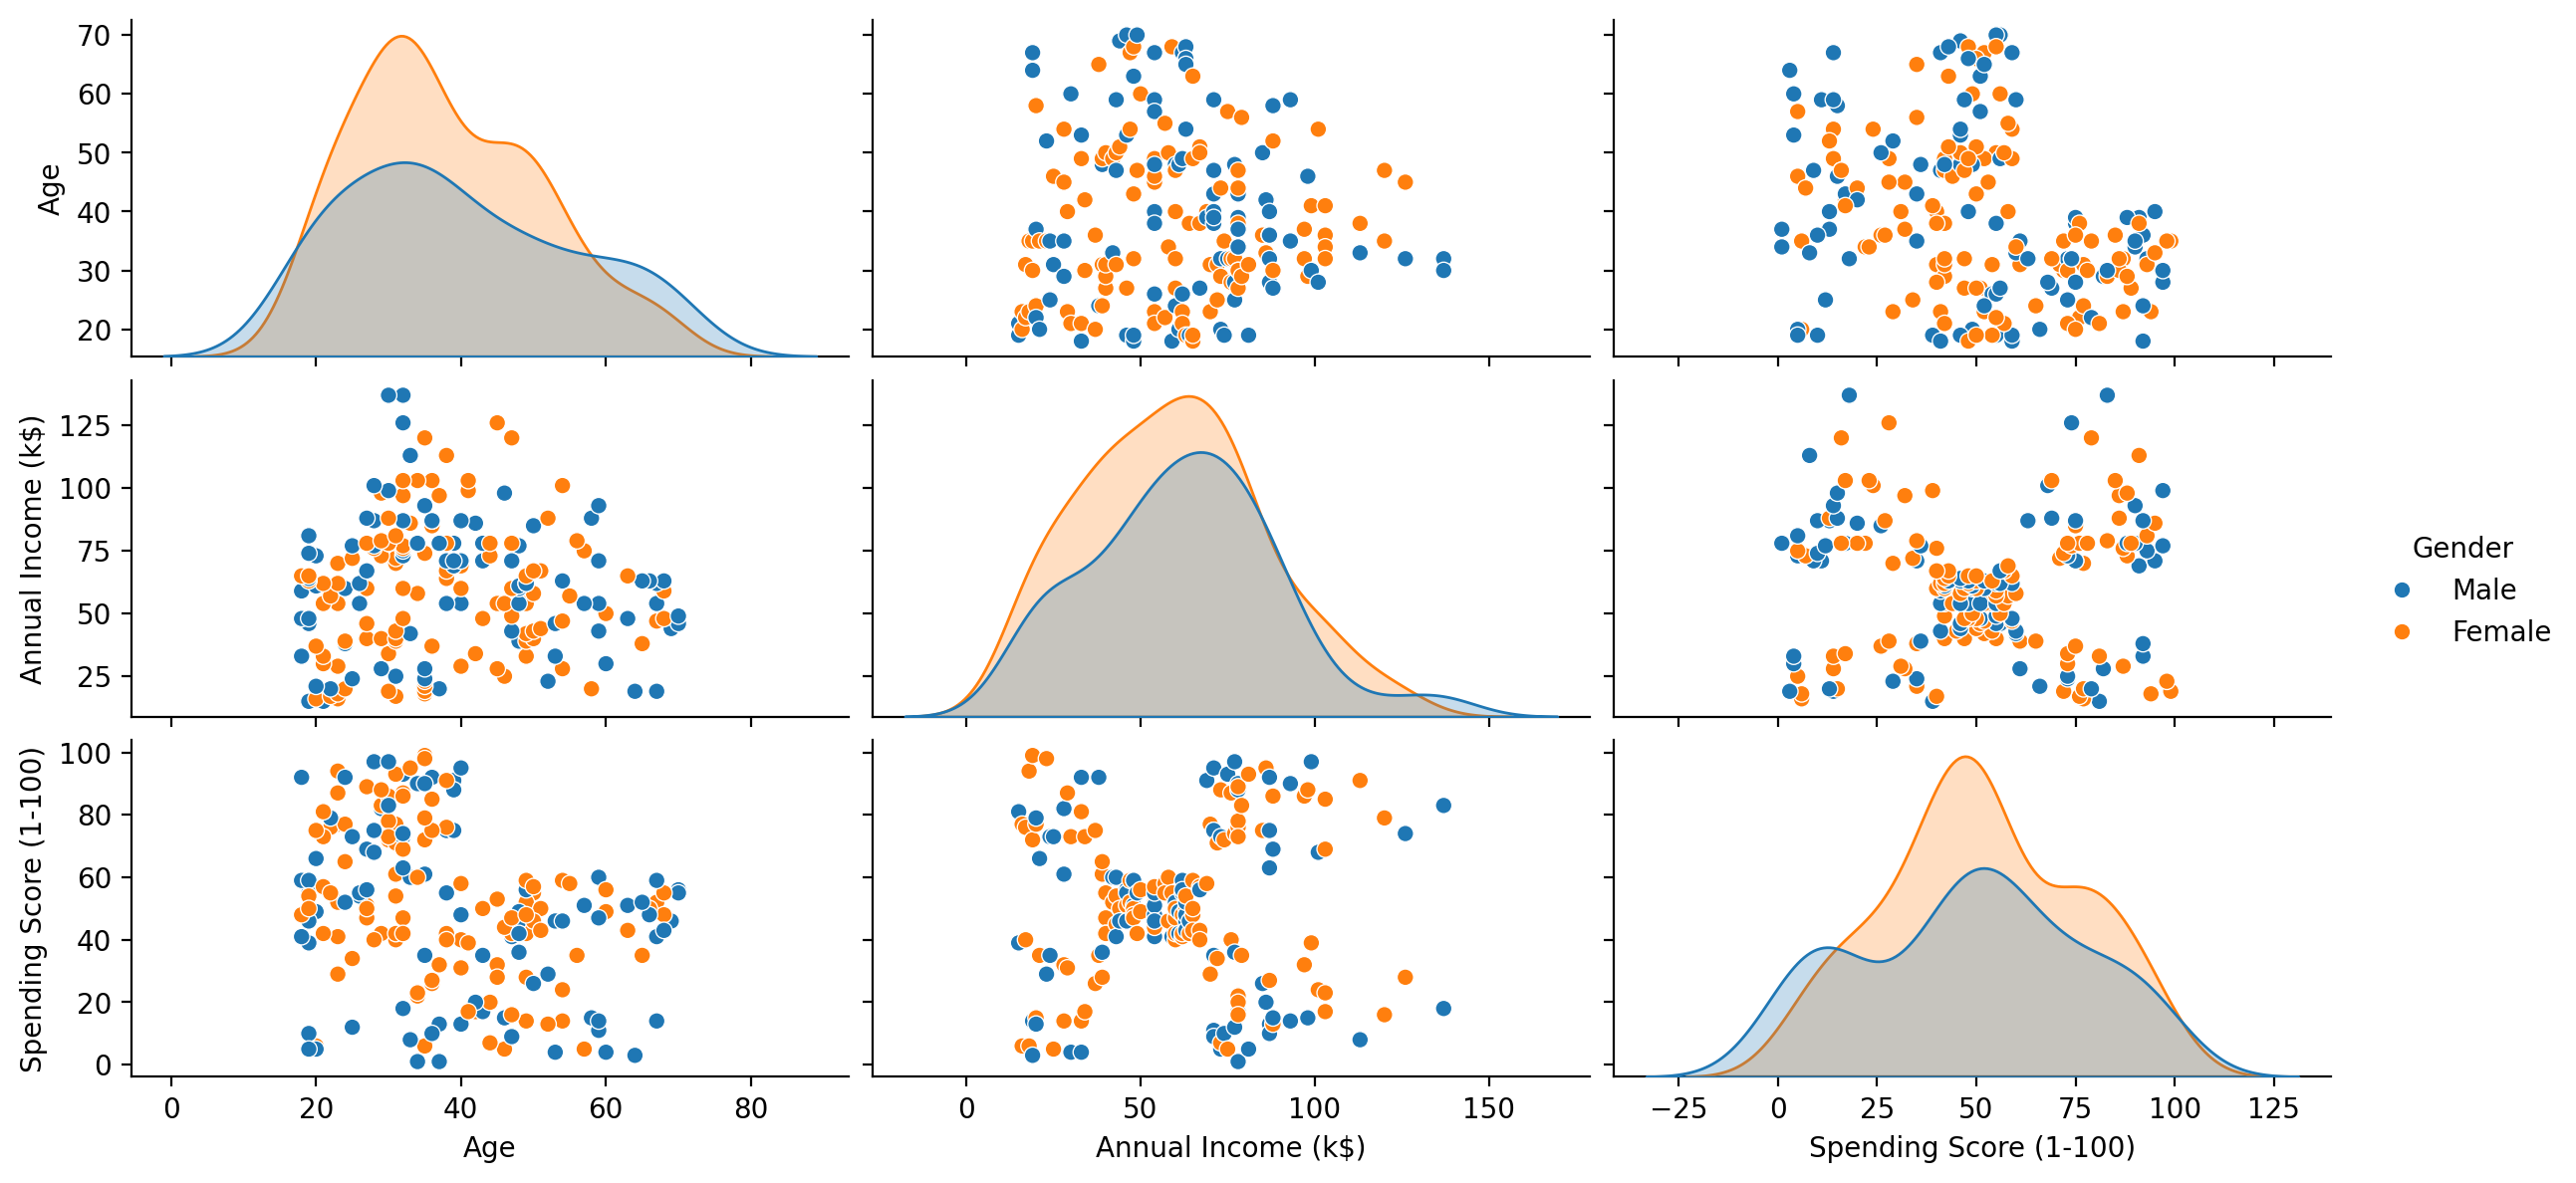

In [6]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = (200)

sns.pairplot(df, height=2, aspect=2, hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

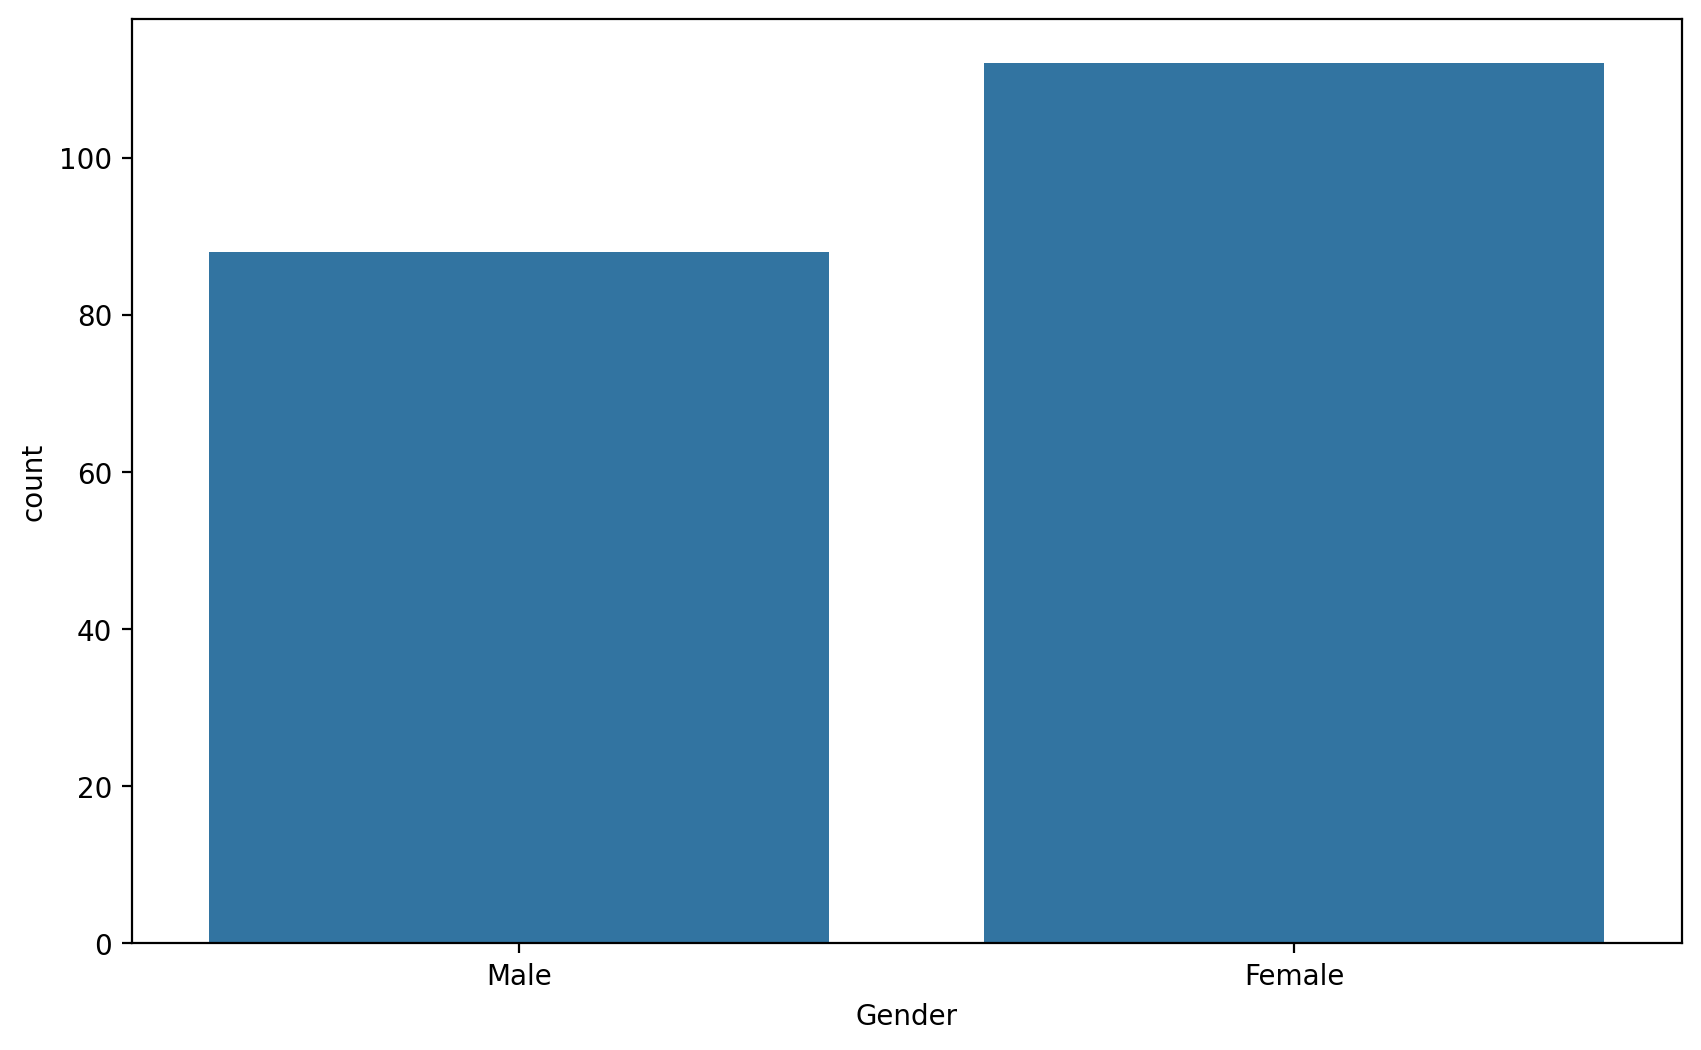

In [7]:
sns.countplot(x=df['Gender'])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('/content/drive/MyDrive/CSV/mall_customer.csv')
X = df.iloc[:, 2:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

gender = df['Gender']
df = pd.DataFrame(X, columns=['age', 'income', 'score'])
df['Gender'] = gender

In [11]:
df

,age,income,score,Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female
196,0.441365,2.497807,-0.861839,Female
197,-0.491602,2.497807,0.923953,Male
198,-0.491602,2.917671,-1.250054,Male


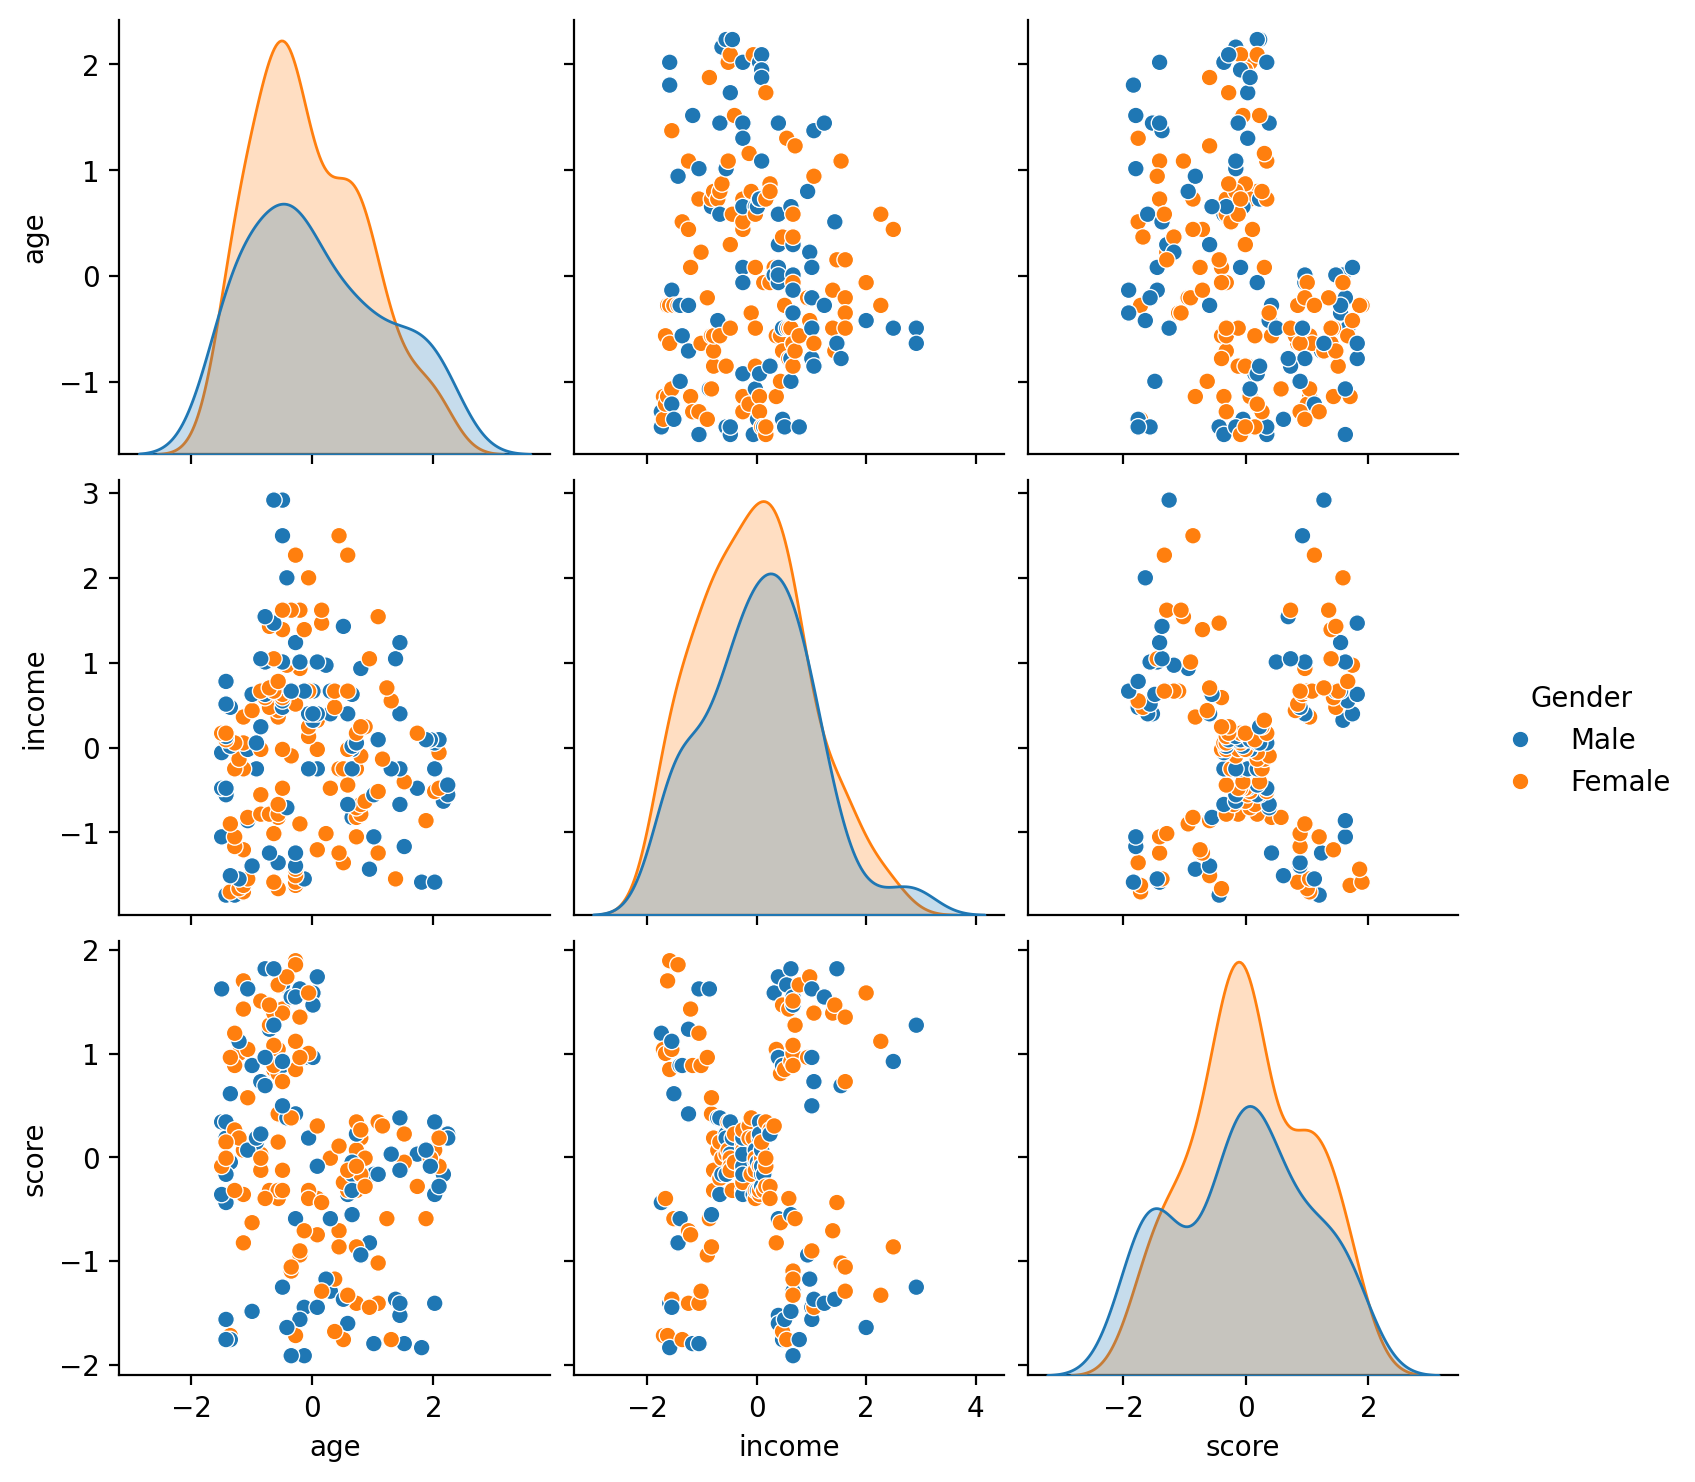

In [12]:
sns.pairplot(df, hue='Gender')

Segmentation on Age and Score

<Axes: xlabel='age', ylabel='score'>

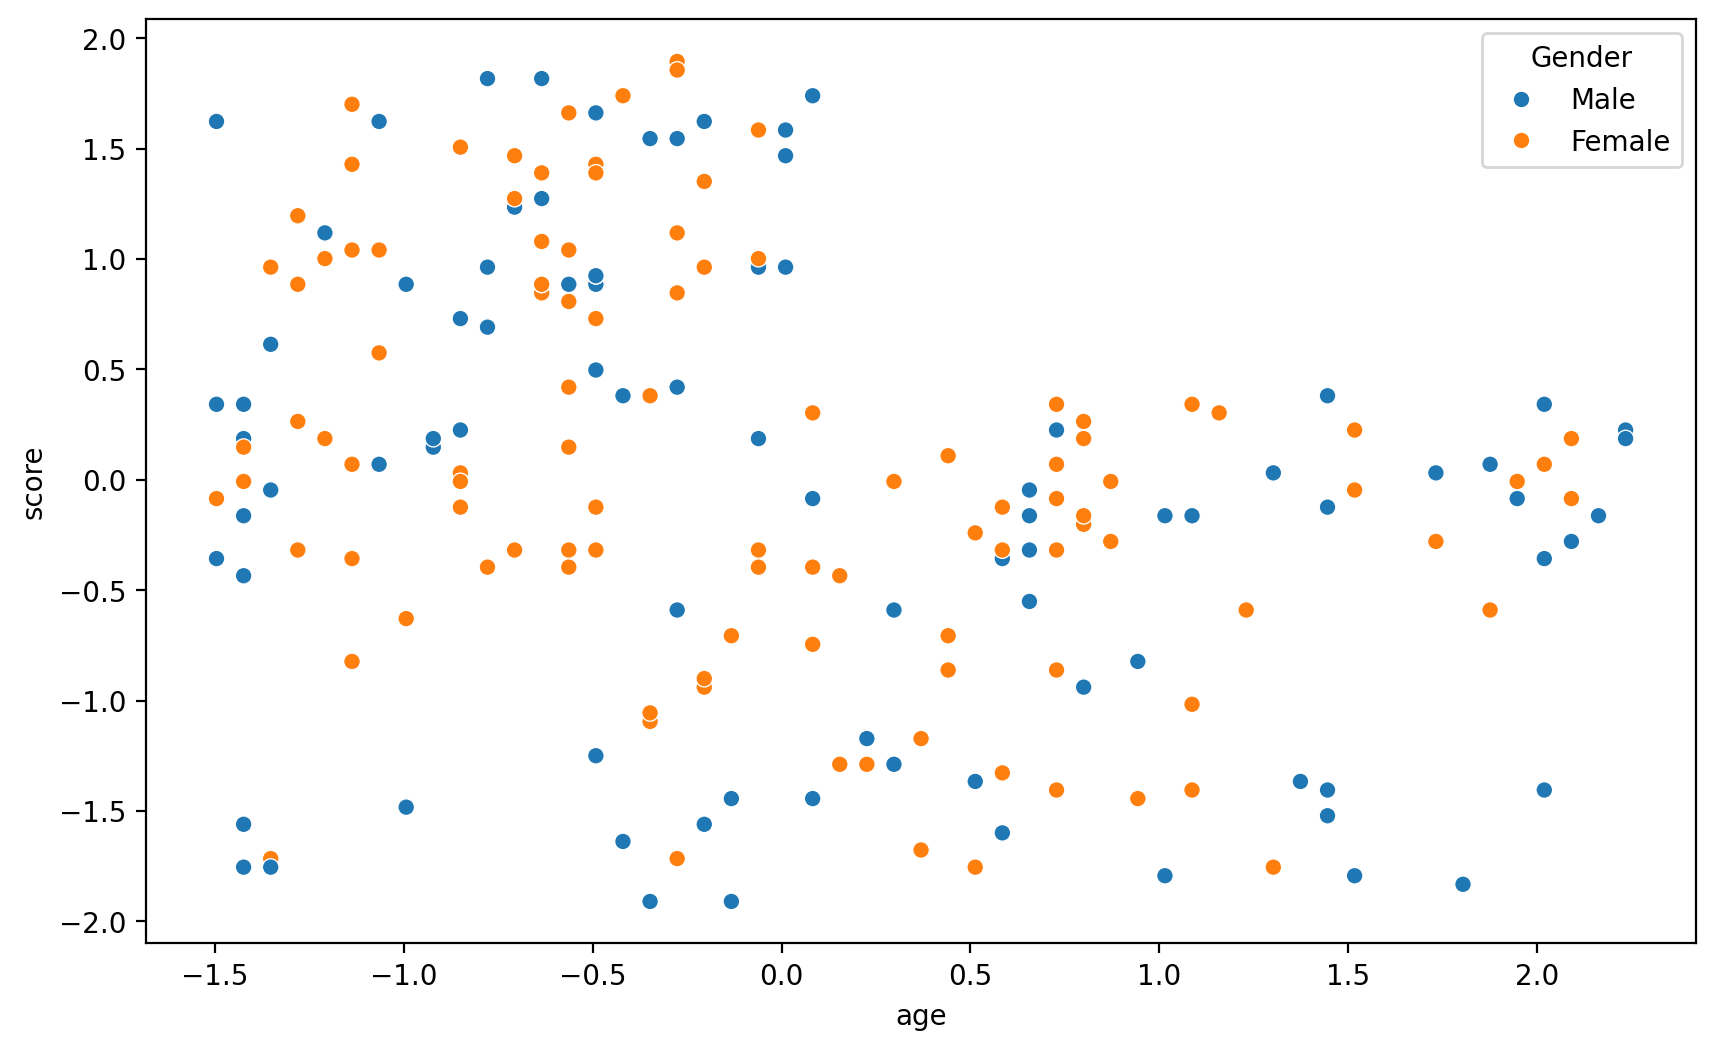

In [13]:
sns.scatterplot(x=df['age'], y=df['score'], hue=df['Gender'])

In [14]:
columns = list (df.columns)
columns

['age', 'income', 'score', 'Gender']

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)


X = df[['age', 'score']].to_numpy()
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [17]:
labels = kmeans.labels_

kmeans.cluster_centers_

kmeans.inertia_

189.3874903399244

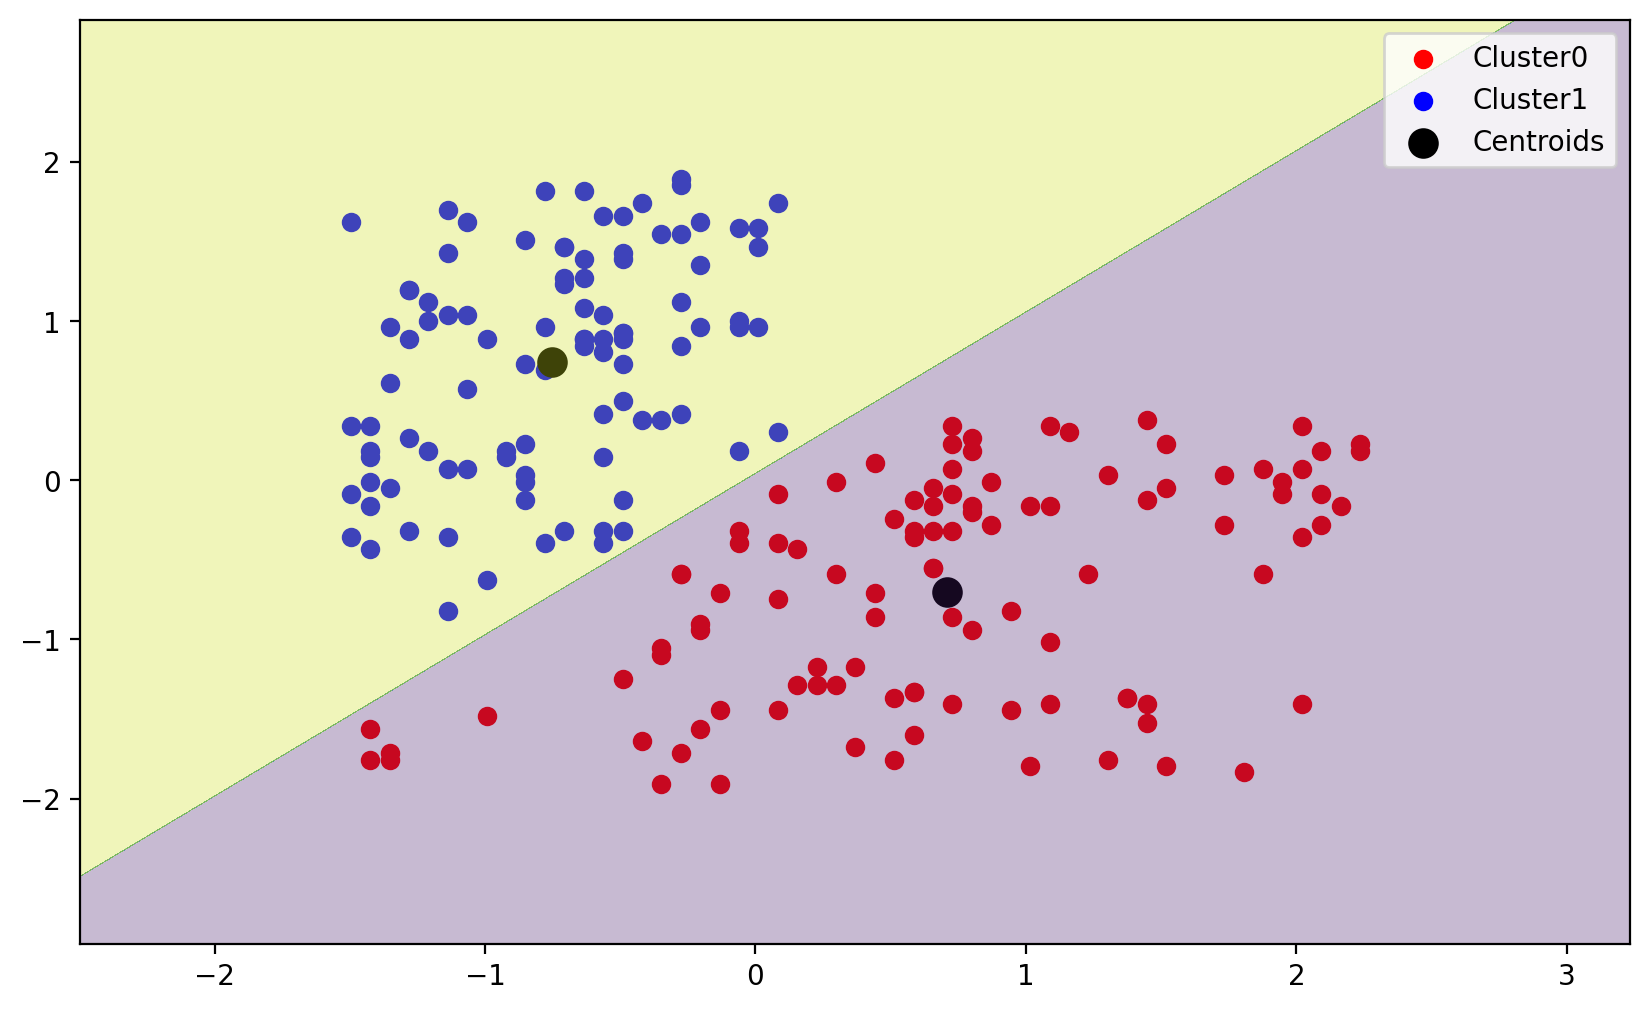

In [18]:

clust0 = labels==0
clust1 = labels==1

plt.scatter(X[clust0,0], X[clust0,1], c='red', label='Cluster0')
plt.scatter(X[clust1,0], X[clust1,1], c='blue', label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')


x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

x_min, x_max, y_min, y_max

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

region_points = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)

Z = kmeans.predict(region_points)

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()

Decision Boundary Fellowship


Putting Everything Together

Clusters 0: 38 Customers
Clusters 1: 65 Customers
Clusters 2: 50 Customers
Clusters 3: 47 Customers


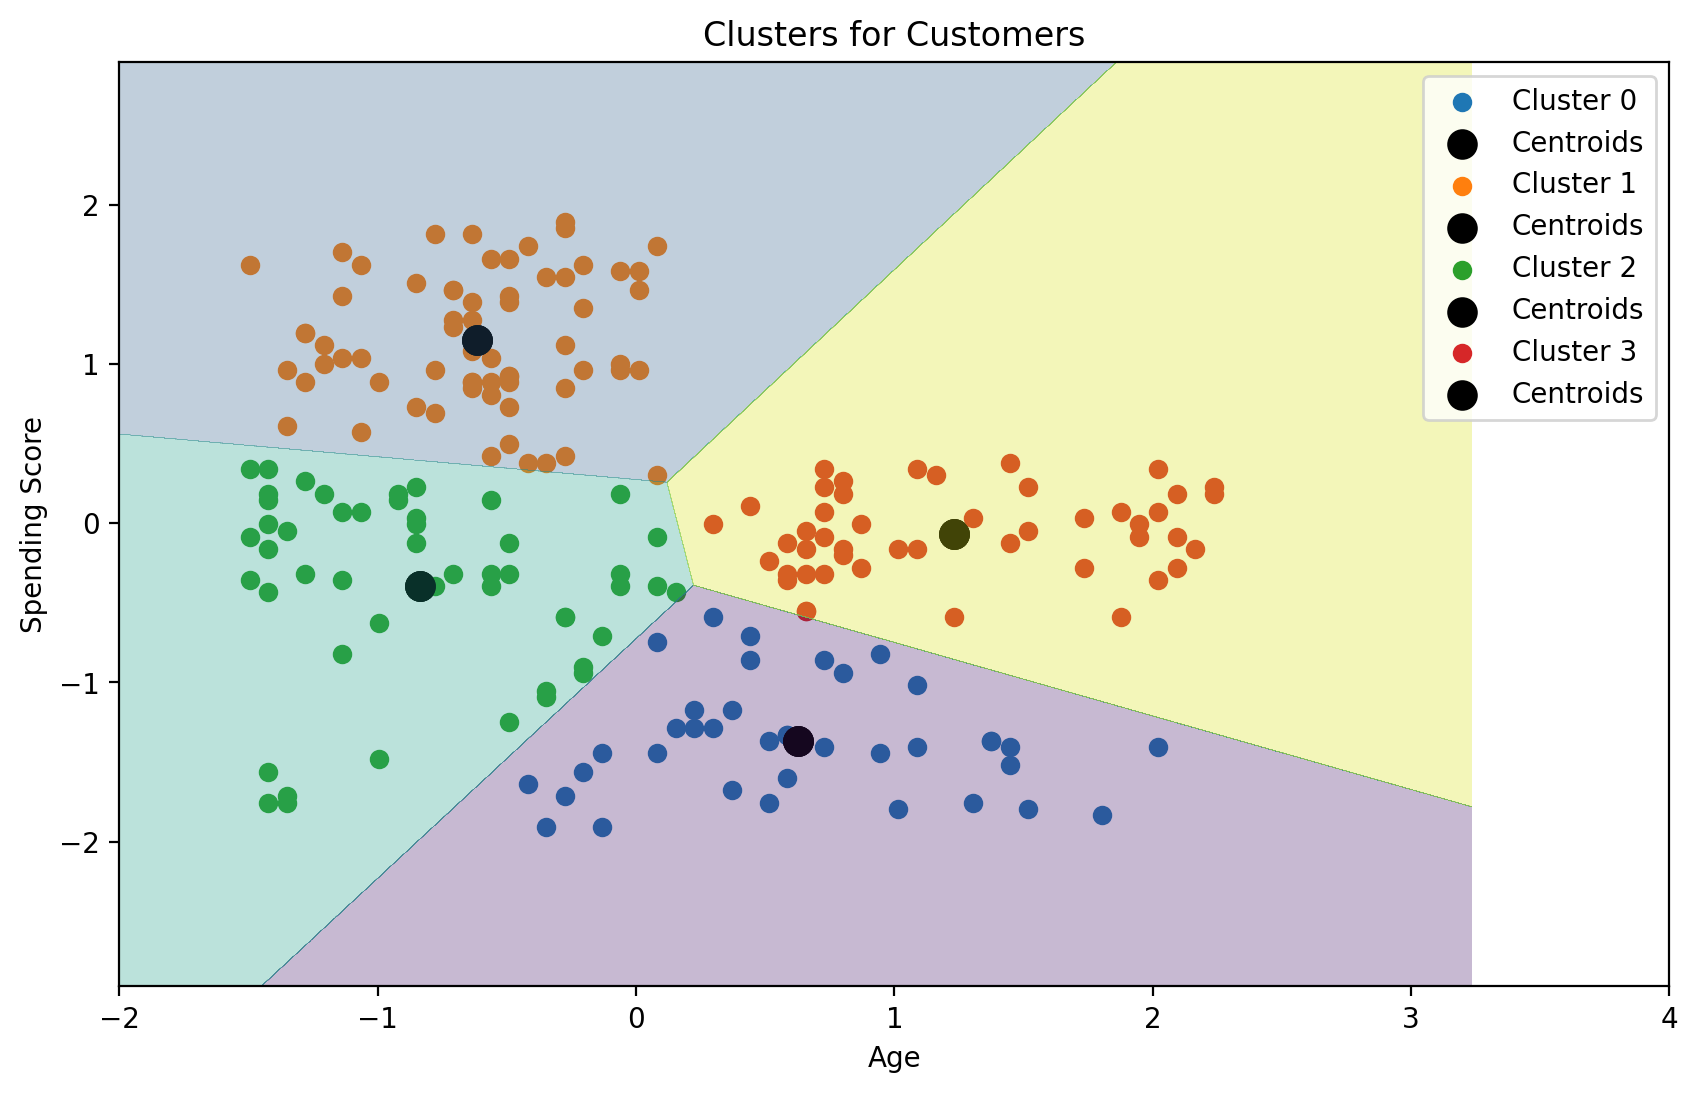

In [19]:
k = 4
kmeans = KMeans(n_clusters=k)

X = df[['age', 'score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
  clust_i = labels==idx
  print('Clusters {}: {} Customers'. format(idx, sum(clust_i)))

  plt.scatter(X[clust_i,0], X[clust_i,1], label='Cluster {}'.format(idx))

  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

  plt.title('Clusters for Customers')
  plt.xlabel('Age')
  plt.ylabel('Spending Score')
  plt.legend()
  plt.xlim(-2,4)

#decision boundary

x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

x_min, x_max, y_min, y_max

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

region_points = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)

Z = kmeans.predict(region_points)

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()